![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [5]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [6]:
# 1. Preprocesamiento
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering (3 especies → 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar etiquetas de cluster al DataFrame original
penguins_df['cluster'] = clusters

# 3. Crear stat_penguins con estadísticas por cluster
stat_penguins = penguins_df.groupby('cluster')[numeric_cols].mean().reset_index()

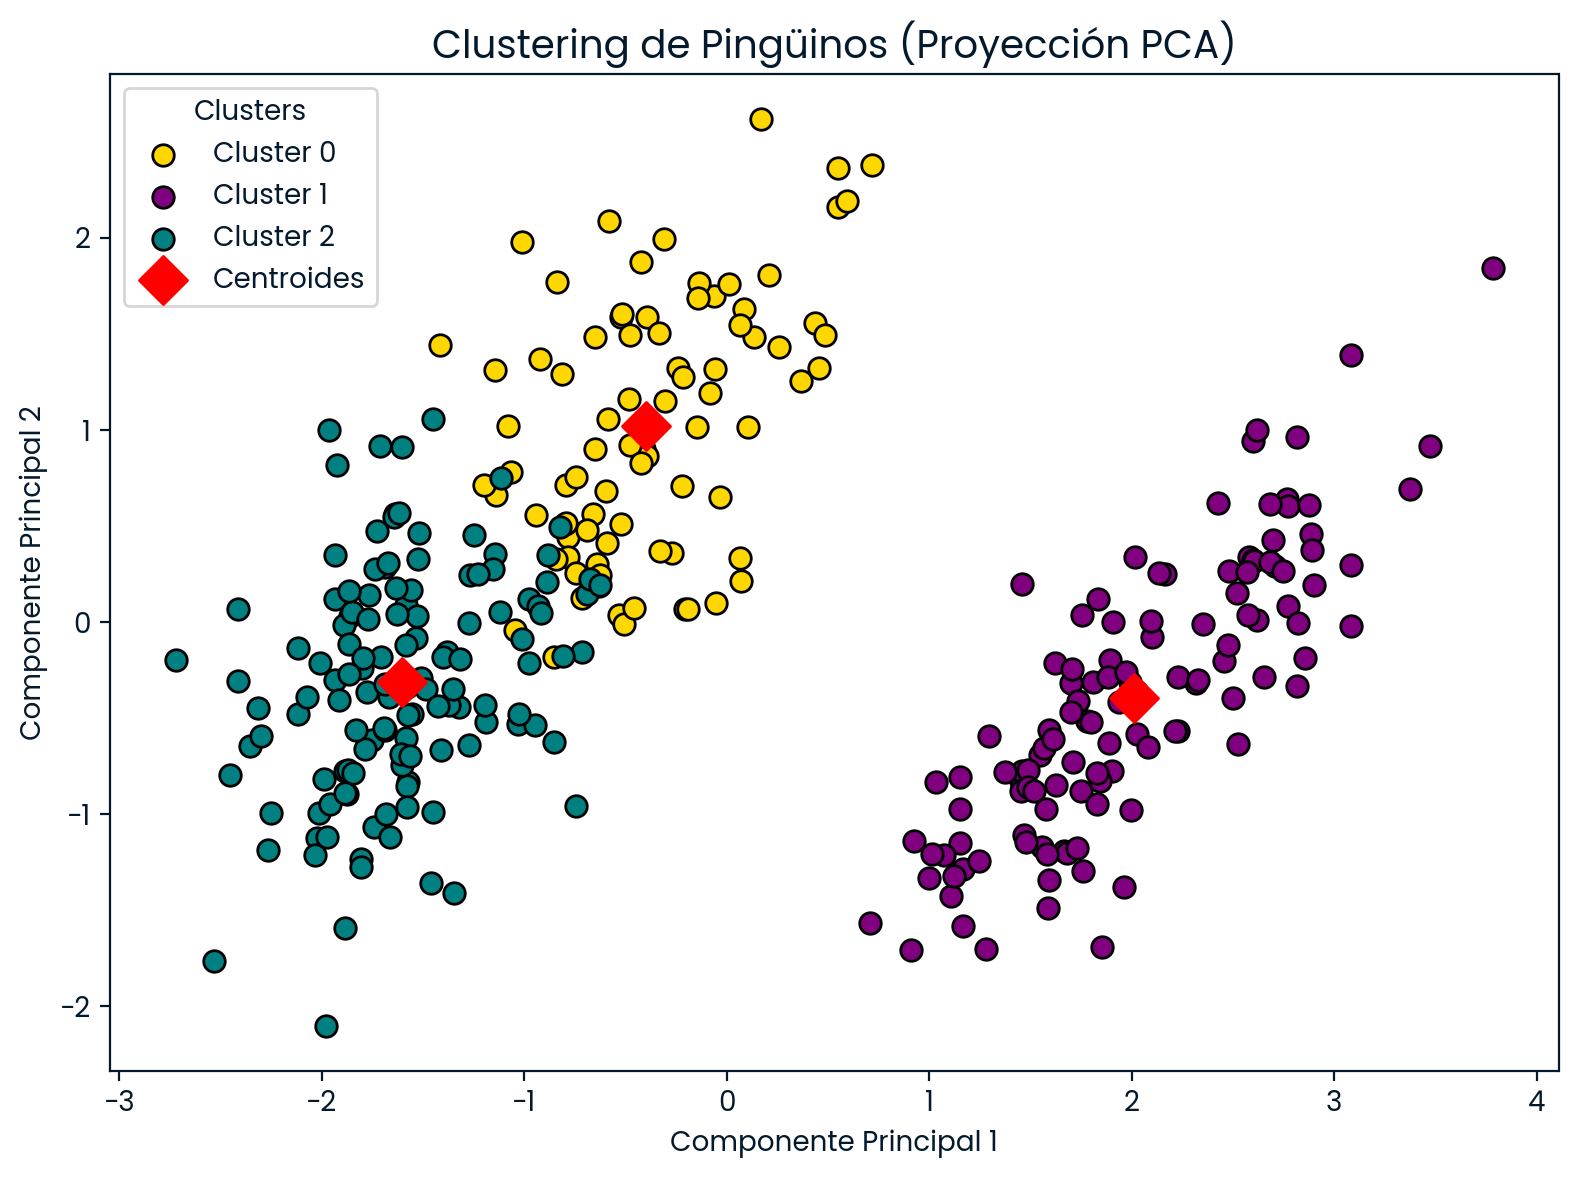

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Reducir dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calcular centroides proyectados con PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Crear DataFrame para graficar
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Colores y etiquetas por cluster
colors = ['gold', 'purple', 'teal']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

plt.figure(figsize=(8,6))

# Dibujar los puntos de cada cluster
for i in range(3):
    plt.scatter(
        pca_df[pca_df['cluster'] == i]['PC1'],
        pca_df[pca_df['cluster'] == i]['PC2'],
        label=labels[i],
        color=colors[i],
        edgecolor='k',
        s=60
    )

# Dibujar los centroides
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='D',
    color='red',
    s=150,
    label='Centroides'
)

plt.title("Clustering de Pingüinos (Proyección PCA)", fontsize=14)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters")
plt.tight_layout()
plt.savefig("scatter_clusters_with_centroids.png", dpi=300)
plt.show()


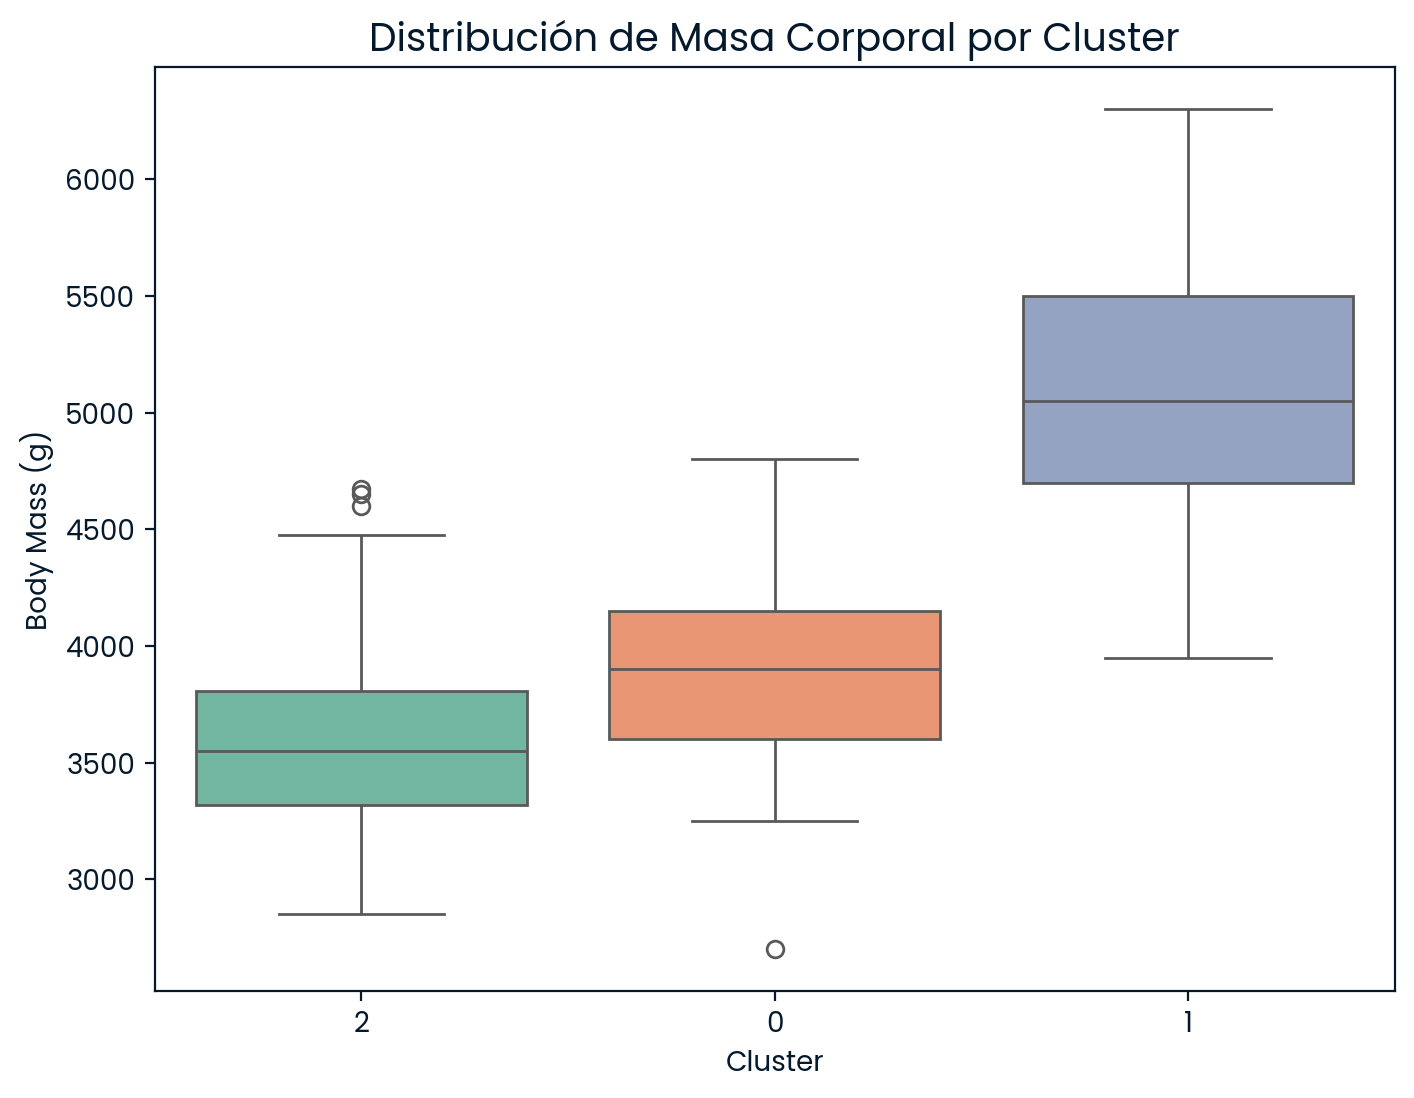

In [11]:
import seaborn as sns

# Asegurarse que el cluster sea tipo string para plot
penguins_df['cluster'] = penguins_df['cluster'].astype(str)

plt.figure(figsize=(8,6))
sns.boxplot(data=penguins_df, x='cluster', y='body_mass_g', palette="Set2")
plt.title("Distribución de Masa Corporal por Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Body Mass (g)")
plt.tight_layout()
plt.savefig("boxplot_body_mass.png", dpi=300)
plt.show()


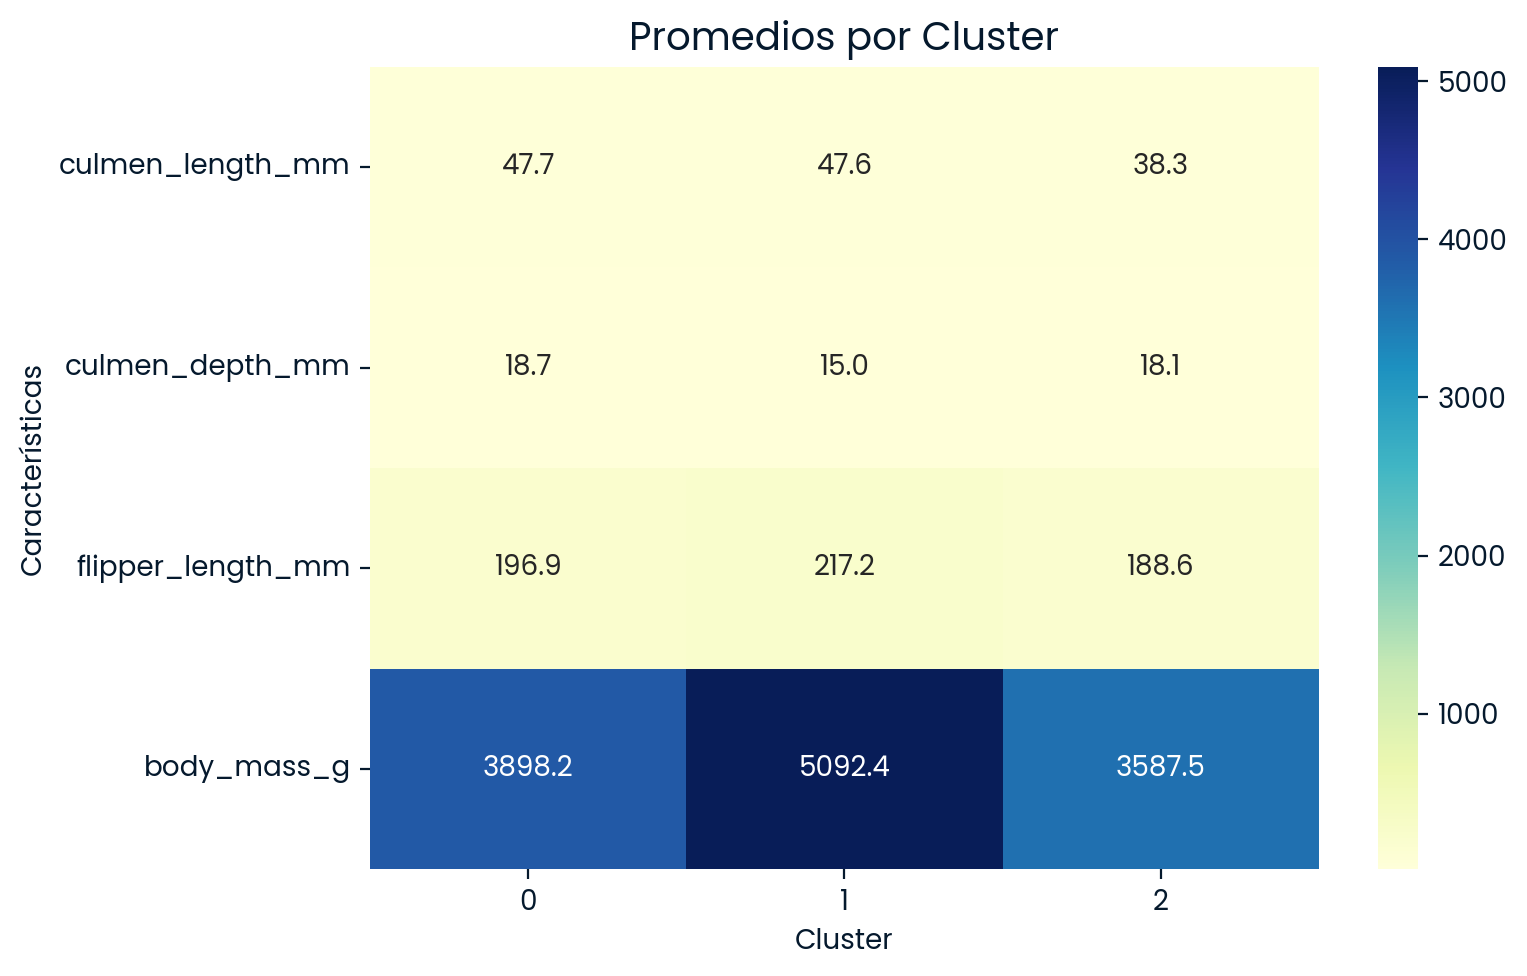

In [22]:
plt.figure(figsize=(8, 5))
sns.heatmap(stat_penguins.set_index('cluster').T, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Promedios por Cluster", fontsize=14)
plt.ylabel("Características")
plt.xlabel("Cluster")
plt.tight_layout()
plt.savefig("heatmap_transpuesto_stat_penguins.png", dpi=300)
plt.show()

